<img src="images/senti.jpg">

### <font color=blue>Importing required libraries</font>

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools
from warnings import filterwarnings
filterwarnings("ignore")

### <font color=blue>Loading dataset</font>

In [4]:
data = list()
data_labels = list()

try:
    with open("input/pos.txt") as file:
        for line in file: 
            data.append(line) 
            data_labels.append('pos')
except UnicodeDecodeError:
    pass
    
try:
    with open("input/neg.txt") as f:
        for i in f: 
            data.append(i)
            data_labels.append('neg')
except UnicodeDecodeError:
    pass


### <font color=blue>Representing data as a Matrix</font>

In [11]:
vectorizer = CountVectorizer(analyzer = 'word', lowercase = True)
features = vectorizer.fit_transform(data)
features_nd = features.toarray()

In [ ]:
vectorizer.fit(data)
vectorizer.transform(data)

In [12]:
features.shape

(2606, 7455)

In [13]:
X_train, X_test, y_train, y_test  = train_test_split(
        features_nd, 
        data_labels,
        train_size=0.80, 
        random_state=1234)

In [14]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', len(y_train))
print('y_test: ', len(y_test))

X_train:  (2084, 7455)
X_test:  (522, 7455)
y_train:  2084
y_test:  522


### <font color=blue>Prediction</font>

In [16]:
log_model = LogisticRegression()
log_model = log_model.fit(X=X_train, y=y_train)
y_pred = log_model.predict(X_test)

In [17]:
import random
j = random.randint(0,len(X_test)-7)
for i in range(j,j+7):
    print(y_pred[0])
    ind = features_nd.tolist().index(X_test[i].tolist())
    print(data[ind].strip())

neg
@Alexnevamind @kaz2251 @iloveicecream1 she moved out  i miss her she is totally into them! more than me!i still have a lot of people here
neg
@alicehannah i know
neg
@AlanDistro http://twitpic.com/6uguf - his cock of course, he got it on his first birthday
neg
@alexxabb amanda had to go to carlos'  , and i saw a music video that was about roller blading!! ...weirddd
neg
@akyna I hadn't and I'm lapping it up! Thanks.... and I hope the shared-workspace  is a temp thing
neg
@afaustino22 ah you suck akeem! i really really wanted to go!  i ended up going to a wedding and then with harjas to the homeless shelter.
neg
@alancfrancis  iTunes doesn't have Maiden Japan.  I had that back in the day.  I'll get some of the live albums later.


### <font color=blue>Evaluation</font>

In [18]:
print(accuracy_score(y_test, y_pred))

0.7681992337164751


In [19]:
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[311,  29],
       [ 92,  90]], dtype=int64)

In [20]:
y_test.count('pos')

182

In [21]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[311  29]
 [ 92  90]]


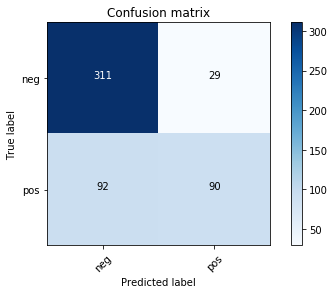

In [22]:
plot_confusion_matrix(cnf_matrix, classes=['neg','pos'])